# AGRUPACIÓN AGLOMERATIVA (JERARQUICA)

El agrupamiento aglomerativo se refiere a una colección de algoritmos de agrupamiento que se basan en dos principios: 
   * El algoritmo comienza declarando cada punto como su propio grupo. 
   * Se fusionan los dos grupos más similares hasta que se satisface algún criterio de paro.

El criterio de paro implementado es la cantidad de clústers, por lo que los clústers similares se fusionan 
hasta que solo quedará la cantidad especificada de clústeres.

Para que el proceso de agrupamiento pueda llevarse a cabo tal como se indica, es necesario definir cómo se cuantifica la similitud entre dos clusters. Es decir, se tiene que extender el concepto de distancia entre pares de observaciones para que sea aplicable a pares de grupos, cada uno formado por varias observaciones. A este proceso se le conoce como **linkage**.  Hay varios criterios de vinculación que especifican cómo se mide exactamente el "grupo más similar". Esta medida siempre se define entre dos clústeres existentes y dentro de las medidas se encuentran:

* *Ward*: elige los dos grupos para fusionarlos de modo que la varianza dentro de todos los grupos aumente lo mínimo. Esto a menudo conduce a clústeres que tienen un tamaño relativamente similar. Minimiza la suma de las diferencias al cuadrado dentro de todos los grupos.
* *Promedio (average)*: fusiona los dos grupos que tienen la distancia promedio más pequeña entre todos sus puntos.
* *Completo (complete)*: fusiona los dos grupos que tienen la distancia máxima más pequeña entre sus puntos. Tiende a generar clúster más compactos pero frecuentemente desbalanceados. 
* *Single*: fusiona los dos grupos con la distancia mínima entre sus puntos. Regularmente forma clusters en forma de cadena.  

El clúster aglomerativo tiene un comportamiento de "rico se vuelve más rico" que conduce a tamaños de clúster desiguales.

**Nota:** Debido a la forma en que funciona el algoritmo, el agrupamiento aglomerativo no puede hacer predicciones para nuevos puntos de datos.

El agrupamiento aglomerativo produce lo que se conoce como agrupamiento jerárquico. El agrupamiento procede de manera iterativa, y cada punto hace un viaje desde ser un grupo de un solo punto hasta pertenecer a algún grupo final. Cada paso intermedio proporciona una agrupación de los datos (con un número diferente de agrupaciones).

Existe una herramienta para visualizar la agrupación jerárquica, llamada **dendograma**, que puede manejar conjuntos de datos multidimensionales.

El eje $y$ en el dendograma no solo especifica cuándo se fusionan dos grupos en el algoritmo aglomerativo. La longitud de cada rama también muestra qué tan separados están los grupos fusionados.



Como vimos en el algoritmo K-Means, la forma de medir similitudes entre observaciones es mediante la métrica Euclideana. Pero en los algoritmos aglomerativos podemos usar alguna de las siguientes métricas:

* Euclideana o "l2": raíz cuadrada de la suma de cuadrados.  
* "l1" o "manhattan": suma de diferencias absolutas. 
* "cosine": Distancia basada en el coseno del ángulo entre vectores.
* "chebyshev": Máxima diferencia en cualquier coordenada:
* "minkowski": Generalización de Euclídea y Manhattan (requiere un parámetro 𝑝)
* "hamming": Proporción de posiciones distintas (útil en variables binarias).

Entonces dentro de los algortimos jerarquicos debemos considerar dos cosas importantes:
1. El método de enlace (linkage): como se mide la distancia entre clusters
2. La métrica (metric): como se mide la distancia entre las observaciones individuales.

Algunas observaciones generales con lo anterior son:
* Si queremos clusters compactos y balanceados usar ward con métrica Euclideana.
* Si los datos no son euclideanos  o tienen outliers usar average o complete probando métricas diferentes a la euclideana.
* Si queremos detectar estructuras alargadas usar single. 

In [1]:
import pandas as pd
import numpy as np

#k-medias
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale, StandardScaler

#PCA
from sklearn.decomposition import PCA

#Aglomerativos
from sklearn.cluster import AgglomerativeClustering

#Dendrogramas
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram

Vamos a empezar a analizar los ejemplos que vimos en K-Means

## Ejemplo 1: Simulado

In [2]:
#Usaremos el dataset make_blobs
from sklearn.datasets import make_blobs
X, y=make_blobs(
    n_samples=200,
    n_features=2,
    centers=4,
    cluster_std=0.7,
    random_state=0)

Text(0.5, 1.0, 'Datos simulados')

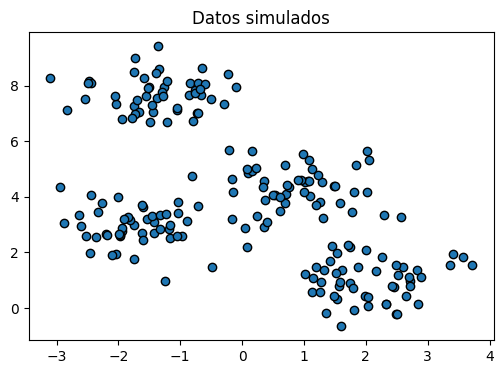

In [3]:
#Obtengamos la gráfica de nuestros datos simulados
fig, ax=plt.subplots(1,figsize=(6,4))
ax.scatter(x=X[:,0],
          y=X[:,1],
          marker='o',
          edgecolor='black')
ax.set_title('Datos simulados')

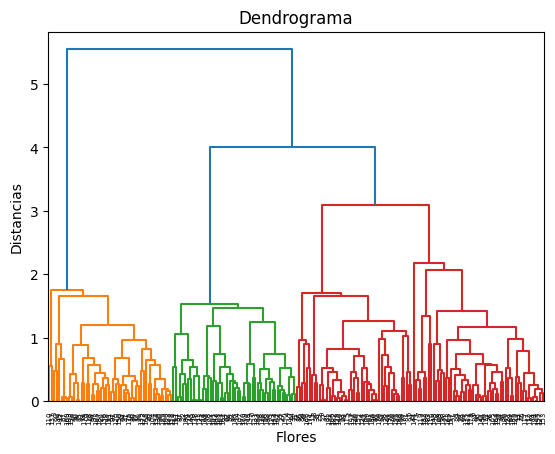

In [4]:
#Visualicemos los dendrogramas con los diferentes métodos
dendrograma=sch.dendrogram(sch.linkage(X, method='average'))

plt.title('Dendrograma')
plt.xlabel('Flores')
plt.ylabel('Distancias')
plt.show()

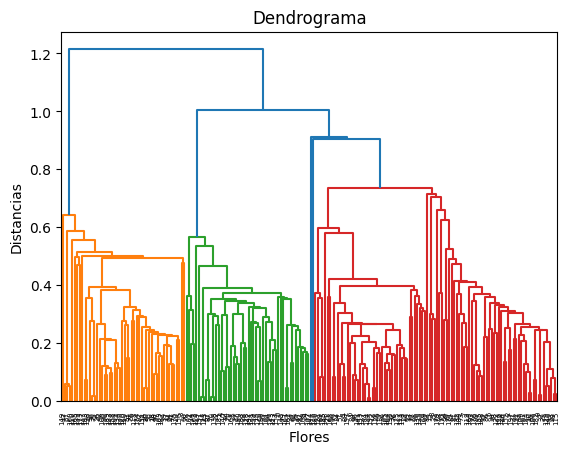

In [5]:
#Visualicemos los dendrogramas con los diferentes métodos
dendrograma=sch.dendrogram(sch.linkage(X, method='single'))

plt.title('Dendrograma')
plt.xlabel('Flores')
plt.ylabel('Distancias')
plt.show()

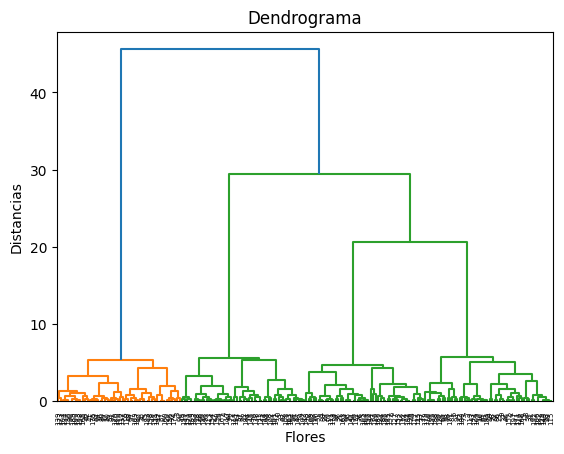

In [6]:
#Visualicemos los dendrogramas con los diferentes métodos
dendrograma=sch.dendrogram(sch.linkage(X, method='ward'))

plt.title('Dendrograma')
plt.xlabel('Flores')
plt.ylabel('Distancias')
plt.show()

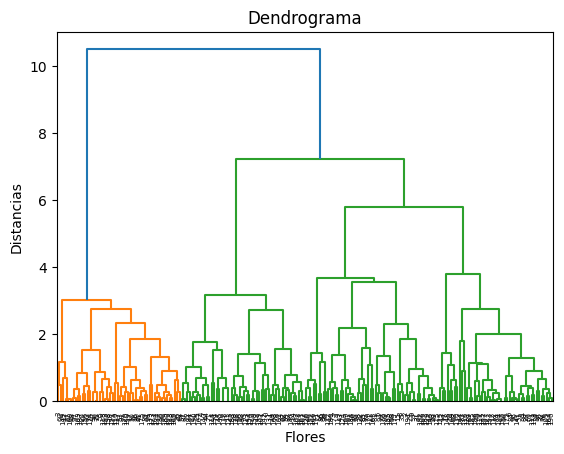

In [7]:
#Visualicemos los dendrogramas con los diferentes métodos
dendrograma=sch.dendrogram(sch.linkage(X, method='complete'))

plt.title('Dendrograma')
plt.xlabel('Flores')
plt.ylabel('Distancias')
plt.show()

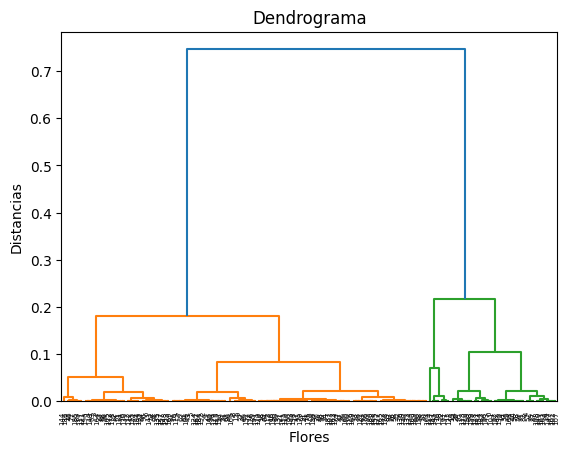

In [14]:
#Visualicemos los dendrogramas con los diferentes métodos
dendrograma=sch.dendrogram(sch.linkage(X, method='average', metric='cosine'))

plt.title('Dendrograma')
plt.xlabel('Flores')
plt.ylabel('Distancias')
plt.show()

Al analizar los diferentes dendrogramas, usaremos el linkage "single" y el corte para generar nuestros clusters lo dejaremos en 1, por lo que estaremos formando 4 clusters. 

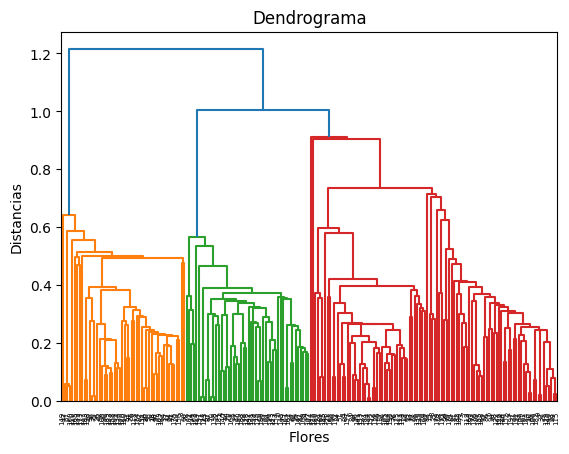

In [15]:
#Visualicemos los dendrogramas con los diferentes métodos
dendrograma=sch.dendrogram(sch.linkage(X, method='single'),color_threshold=1)

plt.title('Dendrograma')
plt.xlabel('Flores')
plt.ylabel('Distancias')
plt.show()

In [16]:
#Modelo aglomerativo
aglom=AgglomerativeClustering(n_clusters=4, linkage='ward')

In [17]:
#Predicciones
yp=aglom.fit_predict(X)

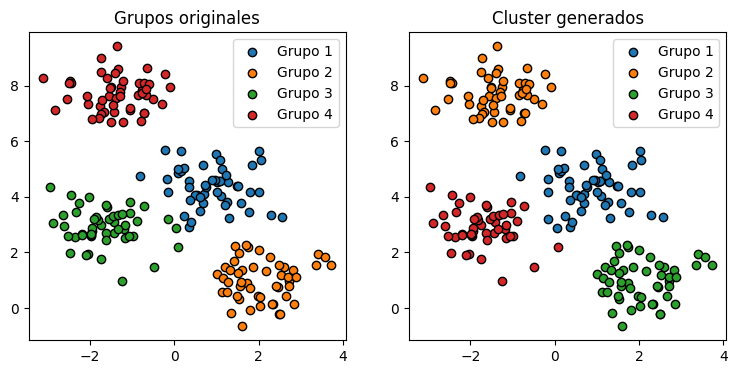

In [18]:
#Vamos a graficar los resultados de k-medias y los vamos a comparar con los originales

# Grupos originales vs clusters generados
fig, ax=plt.subplots(1,2,figsize=(9,4))

#Grupos originales
for i in np.unique(y):
    ax[0].scatter(
    x=X[y==i,0],
    y=X[y==i,1],
    c=plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
    marker='o',
    edgecolor='black',
    label=f"Grupo {i+1}")
ax[0].set_title('Grupos originales')
ax[0].legend();

#Clusters generados
for i in np.unique(yp):
    ax[1].scatter(
    x=X[yp==i,0],
    y=X[yp==i,1],
    c=plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
    marker='o',
    edgecolor='black',
    label=f"Grupo {i+1}")
ax[1].set_title('Cluster generados')
ax[1].legend();

**OBSERVACIONES**: En estos datos simulados, al usar una desviación estándar de 0.3, obtuvimos que el mejor linkage es "single" con 4 clusters. Pero al momento, de cambiar la desviación estándar a 0.7, el linkage "single" pasa a ser el peor método, en su lugar el método "ward" es la mejor opción, tambióne con 4 clusters. 

Al igual que K-Means, con los algoritmos aglomerativos podemos usar el coeficiente de Shilouette para obtener el número óptimo de Clusters. 

Text(0, 0.5, 'Media de Shilouette')

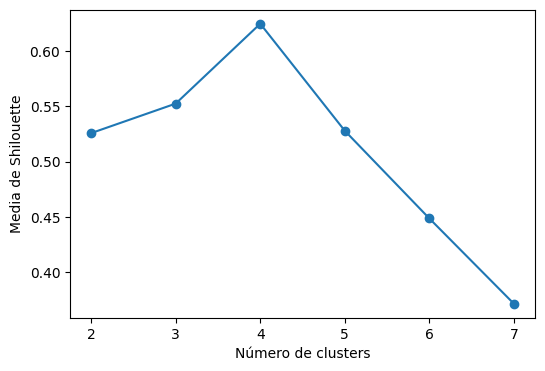

In [19]:
#Paso 1: Selección del número óptimo de cluster.
#Coeficiente de Shilouette
rango=range(2,8) #son los valores de clusters que probaremos para elegir donde se encuentre el máximo
valores_medios=[]

for n_clusters in rango:
    aglom=AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    etiquetas=aglom.fit_predict(X)
    valores_m=silhouette_score(X,etiquetas)  #Coeficiente neceseta los datos y los grupos que se generaron.
    valores_medios.append(valores_m)
#Obtenemos un gráfico donde sea más visible el número óptimo de clusters, en este caso buscamos el valor máximo
fig, ax=plt.subplots(1,1,figsize=(6,4))
ax.plot(rango,valores_medios, marker='o')
ax.set_xlabel("Número de clusters")
ax.set_ylabel("Media de Shilouette")

> ### Ejercicio: Realizar AglomerativeClustering para la base de datos clientes.
Crear un grupo de clientes que gasten más o ganen más (elección de nuestra preferencia). Usar diferentes métodos de enlace y métricas para encontrar el mejor modelo.

## Ejemplo: Tortugas

La base de datos "Tortugas1" contiene información sobre 48  tortugas con tres variables: longitud, ancho y altura de sus caparazones. 

In [21]:
# Leer un archivo xls
datos = pd.read_excel("C:\\Users\\GabDomDal\\Desktop\\Ejercicios\\Analitica de datos\\Trabajo 18\\Tortugas.xls")

In [72]:
datos.head()

,LONGITUD,ANCHO,ALTURA
0,131,95,46
1,135,106,47
2,162,124,61
3,177,132,67
4,98,81,38


In [22]:
X=np.array(datos[['LONGITUD','ANCHO', 'ALTURA']])

In [23]:
#Como longitud tiene magnitudes más grandes que altura, entonces nos conviene escalar los datos
escala=StandardScaler()
X_s=escala.fit_transform(X)

Text(0, 0.5, 'Media de Shilouette')

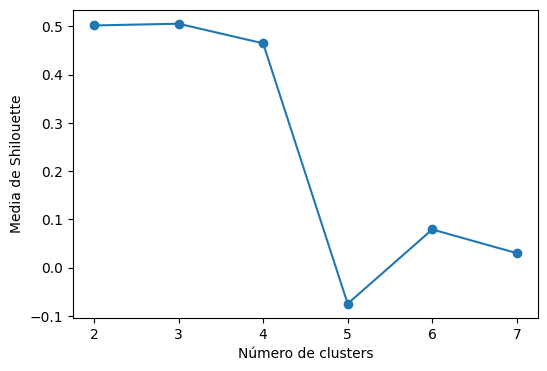

In [24]:
#Selección del número óptimo de cluster.
#Coeficiente de Shilouette
rango=range(2,8) #son los valores de clusters que probaremos para elegir donde se encuentre el máximo
valores_medios=[]

for n_clusters in rango:
    aglom=AgglomerativeClustering(n_clusters=n_clusters, linkage='single')
    etiquetas=aglom.fit_predict(X_s)
    valores_m=silhouette_score(X_s,etiquetas)  #Coeficiente neceseta los datos y los grupos que se generaron.
    valores_medios.append(valores_m)
#Obtenemos un gráfico donde sea más visible el número óptimo de clusters, en este caso buscamos el valor máximo
fig, ax=plt.subplots(1,1,figsize=(6,4))
ax.plot(rango,valores_medios, marker='o')
ax.set_xlabel("Número de clusters")
ax.set_ylabel("Media de Shilouette")

Con el coeficiente de Shilouette observamos que con "ward", "complete" y "average" el número óptimo serían 2 clusters, pero con "single" serían 3 (o también 2 clusters)

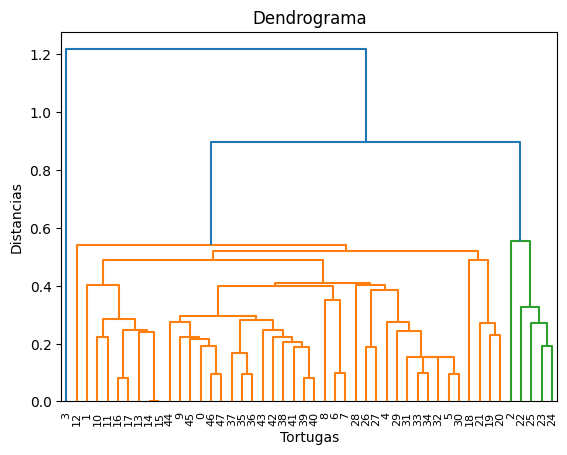

In [25]:
#Visualicemos los dendrogramas con los diferentes métodos
dendrograma=sch.dendrogram(sch.linkage(X_s,method='single'))   #,color_threshold=1)

plt.title('Dendrograma')
plt.xlabel('Tortugas')
plt.ylabel('Distancias')
plt.show()

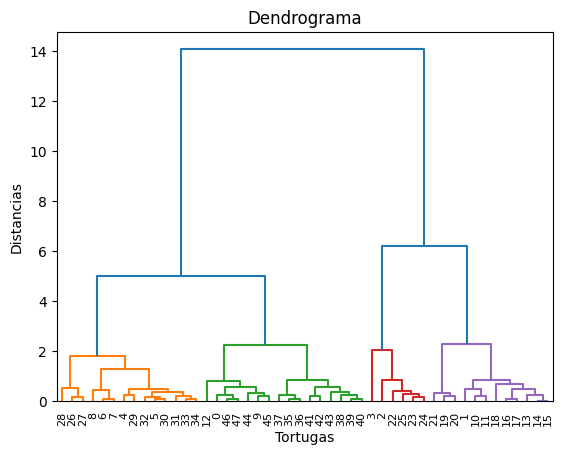

In [26]:
#Visualicemos los dendrogramas con los diferentes métodos
dendrograma=sch.dendrogram(sch.linkage(X_s,method='ward'),color_threshold=5)

plt.title('Dendrograma')
plt.xlabel('Tortugas')
plt.ylabel('Distancias')
plt.show()

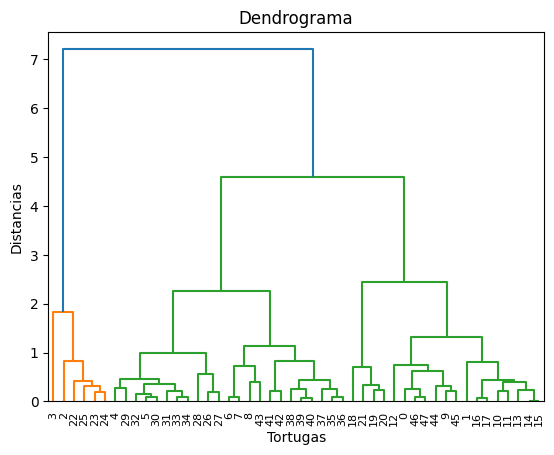

In [27]:
#Visualicemos los dendrogramas con los diferentes métodos
dendrograma=sch.dendrogram(sch.linkage(X_s,method='complete')) #,color_threshold=5)

plt.title('Dendrograma')
plt.xlabel('Tortugas')
plt.ylabel('Distancias')
plt.show()

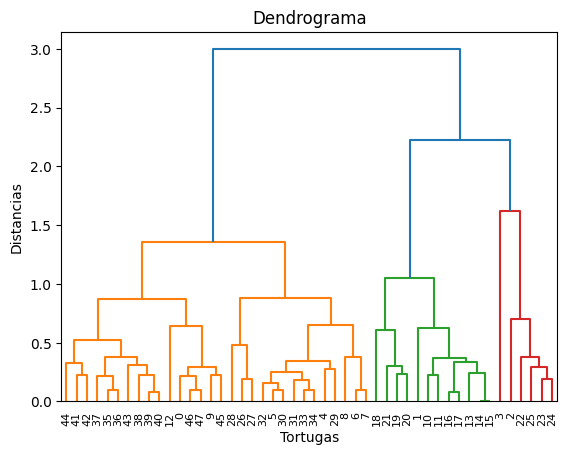

In [28]:
#Visualicemos los dendrogramas con los diferentes métodos
dendrograma=sch.dendrogram(sch.linkage(X_s,method='average')) #,color_threshold=5)

plt.title('Dendrograma')
plt.xlabel('Tortugas')
plt.ylabel('Distancias')
plt.show()

In [29]:
aglom=AgglomerativeClustering(n_clusters=3, linkage='average',compute_distances=True)
yp=aglom.fit_predict(X_s)  #etiquetas.

In [30]:
aglom.distances_

array([0.        , 0.07972509, 0.07972509, 0.09374148, 0.09374148,
       0.09374148, 0.09861795, 0.09861795, 0.15442528, 0.17993216,
       0.18748296, 0.19098525, 0.21280465, 0.21781503, 0.22303106,
       0.22303106, 0.22303106, 0.22787709, 0.23128984, 0.23917527,
       0.24947089, 0.27454938, 0.29116884, 0.29123065, 0.30111133,
       0.30865561, 0.32969452, 0.33313856, 0.3420597 , 0.37382628,
       0.37462666, 0.38041521, 0.38209922, 0.47952886, 0.51968664,
       0.60541395, 0.62641202, 0.64603458, 0.65251364, 0.70228012,
       0.87073942, 0.88189284, 1.05061634, 1.35822612, 1.62027054,
       2.22805409, 2.99385628])

In [31]:
aglom.children_

array([[14, 15],
       [16, 17],
       [39, 40],
       [35, 36],
       [46, 47],
       [ 5, 30],
       [ 6,  7],
       [33, 34],
       [32, 53],
       [31, 55],
       [26, 27],
       [23, 24],
       [37, 51],
       [ 0, 52],
       [10, 11],
       [41, 42],
       [ 9, 45],
       [38, 50],
       [19, 20],
       [13, 48],
       [56, 57],
       [ 4, 29],
       [61, 64],
       [25, 59],
       [21, 66],
       [43, 65],
       [44, 63],
       [49, 67],
       [68, 69],
       [62, 75],
       [60, 73],
       [22, 71],
       [ 8, 54],
       [28, 58],
       [74, 78],
       [18, 72],
       [ 1, 77],
       [12, 70],
       [76, 80],
       [ 2, 79],
       [82, 85],
       [81, 86],
       [83, 84],
       [88, 89],
       [ 3, 87],
       [90, 92],
       [91, 93]])

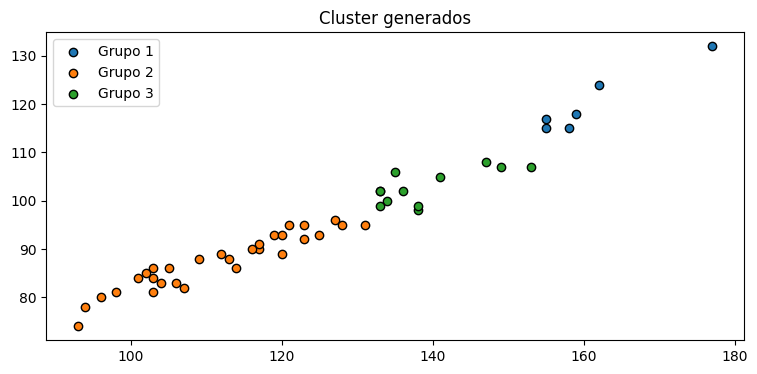

In [32]:
#Vamos a graficar los resultados de k-medias y los vamos a comparar con los originales

# Grupos originales vs clusters generados
fig, ax=plt.subplots(1,1,figsize=(9,4))

#Clusters generados
for i in np.unique(yp):
    ax.scatter(
    x=X[yp==i,0], #longitud
    y=X[yp==i,1], #ancho
    c=plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
    marker='o',
    edgecolor='black',
    label=f"Grupo {i+1}")
ax.set_title('Cluster generados')
ax.legend();

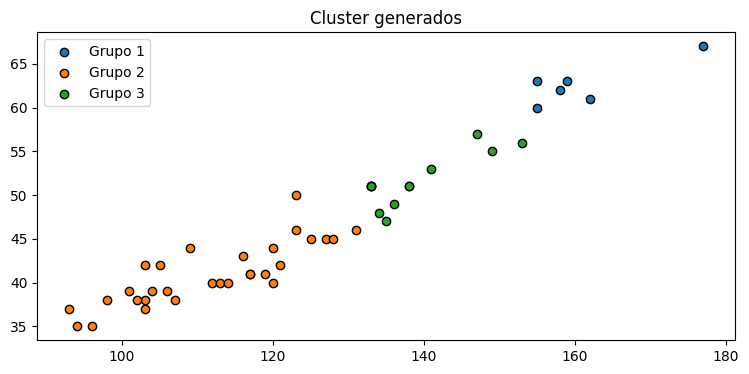

In [33]:
#Vamos a graficar los resultados de k-medias y los vamos a comparar con los originales

# Grupos originales vs clusters generados
fig, ax=plt.subplots(1,1,figsize=(9,4))

#Clusters generados
for i in np.unique(yp):
    ax.scatter(
    x=X[yp==i,0], #longitud
    y=X[yp==i,2], #ancho
    c=plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
    marker='o',
    edgecolor='black',
    label=f"Grupo {i+1}")
ax.set_title('Cluster generados')
ax.legend();

Para mejorar la visualización de los clusters considerando las 3 variables podemos usar componentes principales. 

In [34]:
pca=PCA(n_components=2)
X_c=pca.fit_transform(X_s)

In [35]:
pca.components_      #observamos que la primer componente es un promedio de las tres variables, por lo que esta primer componente
                    #se podría consdierar como el tamaño del caparazón. 

array([[ 0.57874094,  0.57815142,  0.57515204],
       [-0.3504098 , -0.46054532,  0.81554336]])

In [36]:
pca.explained_variance_ratio_

array([0.97793654, 0.01473754])

In [37]:
#Volvemos a realizar el algoritmo pero con X_c
yp=aglom.fit_predict(X_c)

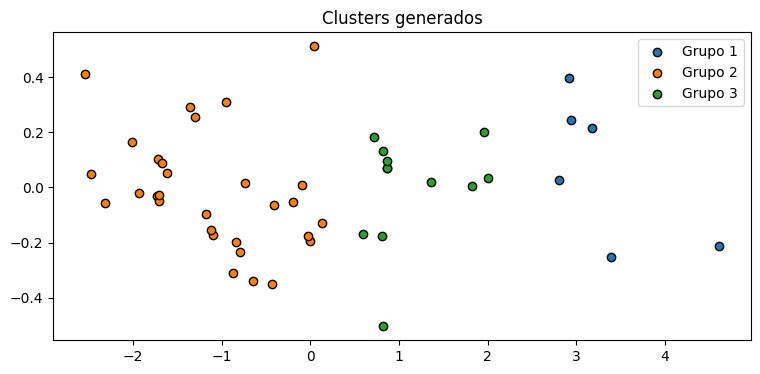

In [38]:
#Vamos a graficar los resultados de k-medias y los vamos a comparar con los originales

# Grupos originales vs clusters generados
fig, ax=plt.subplots(1,1,figsize=(9,4))

#Clusters generados
for i in np.unique(yp):
    ax.scatter(
    x=X_c[yp==i,0], #longitud
    y=X_c[yp==i,1], #ancho
    c=plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
    marker='o',
    edgecolor='black',
    label=f"Grupo {i+1}")
ax.set_title('Clusters generados')
ax.legend();

### OBSERVACIÓNES:
* En este ejemplo de las tortugas, pudimos deducir el comportamiento de cada uno de los clusters en base a las dimensiones de la tortuga. 
* Pero en muchos dataset esto no ocurre, por que no podremos tener la relación de los clusters con las variables. 
* A diferencia de K-Means, cada cluster es representado por su centro. Pero en los aglomerativos no podemos obtener estos centros (ya que medimos distancias entre grupos, no entre observaciones). 
* Una definición que podemos usar para encontrar un punto representativo de cada cluster, son los **medoides**.
* Medoide: es un punto (observación) de la base de datos que mejor representa al cluster, esto es, minimiza la distancia total a todos los demás puntos del mismo cluster. 


In [123]:
#Calculamos los medoides. 
from sklearn.metrics import pairwise_distances
medoides=[]
for cluster in np.unique(yp):
    puntos_cluster=X[yp==cluster]
    distancias=pairwise_distances(puntos_cluster)
    medoide_idx=np.argmin(distancias.sum(axis=1))
    medoides.append(puntos_cluster[medoide_idx])
medoides=np.array(medoides)

print(datos.head())
print(medoides)

   LONGITUD  ANCHO  ALTURA
0       131     95      46
1       135    106      47
2       162    124      61
3       177    132      67
4        98     81      38
[[159 118  63]
 [113  88  40]
 [136 102  49]]


<!-- Encerrar el siguiente texto en un cuadro con sombreado -->
## TAREA:
Consideremos la base de datos "comprar_alquilar". Aplicar AgglomerativeClustering teniendo en cuenta lo siguiente. 

1. Probar los diferentes métodos de enlace y métricas, así como los dendrogramas para obtener el mejor modelo. 
2. Obtener las etiquetas generados por el mejor modelo. (Graficarlos)
3. Ya sea por los gráficos o mediante los medoides, tratar de interpretar los clusters generados. 

Los tres puntos anteriores, hay que realizarlos con la mejor combinación posible (ya sea considerando todas las variables, solo cuantitativas; con las variables originales o usando PCA). 